<a href="https://colab.research.google.com/github/obwogemiss/dsc-running-jupyter-locally-lab/blob/master/PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                             **MOVIE ANALYSIS**

                        **Moringa x Flatiron phase 1 project**

Author: Zubeda Obwoge

**BUSINESS UNDERSTANDING**

For this project I will use exploratory data analysis to generate insights for Microsoft, who wants to venture into movie production.

**Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they do not know anything about creating movies. I will explore what types of films are currently doing the best at the box office, and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**Objectives**

1.   Help microsoft decide what types of movies to create by analyzing trends in the movie industry, focusing on what films perform best at the box office.
2. Provide Microsoft with data-driven recommendations on what types of movies to invest in for maximum box office success.


**Data Understanding**
Our data is a combination of scraped data from the websites listed below and datasets provided by Flatiron.

Box Office Mojo

IMDB

Rotten Tomatoes

TheMovieDB

The Numbers

**Data sets used:**

Movie gross dataset


In [41]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("/content/bom.movie_gross.csv")

Understanding the data

In [43]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [44]:
df.shape

(3387, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [46]:
df.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


DATA CLEANING

We need to work on 3 columns above with missing values in order to progress
1. Domestic_gross 28 missing
- since the values are small, we shall drop
2. Foreign_gross 1350 missing
-since the values are large, we shall fill with 0 and assume theres no reported foreign gross.
3. Studio 5 missing
- we shall drop them because there are only 5 missing

ACTIONS:

1.Remove Dollar signs and commas (convert to Numeric)

2.Handling missing values

3.Create total gross column


In [47]:
df = df.dropna(subset= ['studio'])
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [48]:
df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df['foreign_gross'] = df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

/tmp/ipython-input-2250793238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2250793238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)


In [49]:
df = df.dropna(subset= ['domestic_gross'])
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [50]:
df['foreign_gross'] = df['foreign_gross'].fillna(0)
df

/tmp/ipython-input-3731164473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].fillna(0)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [51]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Adding total_gross columns

In [52]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

/tmp/ipython-input-2723691749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_gross'] = df['domestic_gross'] + df['foreign_gross']


In [53]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

In [54]:
df.shape

(3356, 6)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
 5   total_gross     3356 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 183.5+ KB


In [56]:
df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [57]:
df.isnull().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0
total_gross,0


In [58]:
df.shape

(3356, 6)

In [59]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross'],
      dtype='object')

**Data exploration.**

1. top 10 studios

In [60]:
df.groupby('studio') ['total_gross'].sum().sort_values(ascending=False).head(10)

,total_gross
studio,
BV,4.421288e+10
Fox,3.100537e+10
WB,3.083595e+10
Uni.,2.975716e+10
Sony,2.240492e+10
Par.,1.954926e+10
WB (NL),1.033470e+10
LGF,8.594583e+09
LG/S,5.431924e+09


BV is the leading studio for both domestic and foreign gross

STATISTICS

In [61]:
df[['domestic_gross', 'foreign_gross', 'total_gross']].describe()

,domestic_gross,foreign_gross,total_gross
count,3.356000e+03,3.356000e+03,3.356000e+03
mean,2.877149e+07,4.532518e+07,7.409667e+07
std,6.700694e+07,1.131263e+08,1.711721e+08
min,1.000000e+02,0.000000e+00,1.000000e+02
25%,1.200000e+05,0.000000e+00,2.735000e+05
50%,1.400000e+06,1.400000e+06,5.600000e+06
75%,2.795000e+07,2.970000e+07,6.202500e+07
max,9.367000e+08,9.605000e+08,1.518900e+09


DOMESTIC_GROSS HISTOGRAM

 Domestic Gross

The distribution is right-skewed, with most films earning below $100 million domestically.

A small number of blockbusters account for extremely high domestic grosses.



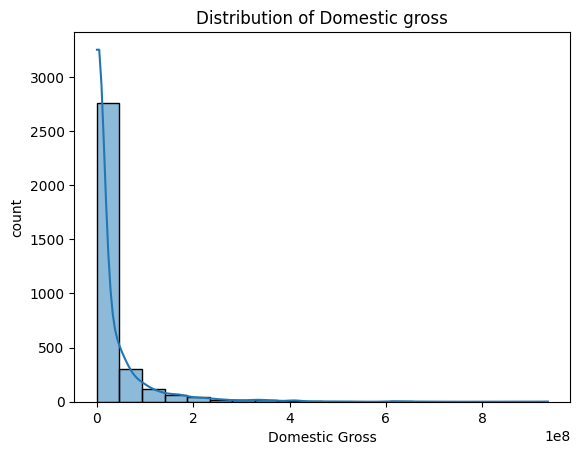

In [62]:
sns.histplot(df['domestic_gross'], bins=20, kde=True)
plt.title('Distribution of Domestic gross')
plt.xlabel('Domestic Gross')
plt.ylabel("count")
plt.show();

FOREIGN GROSS HISTOGRAM
Also right-skewed, with even more missing values filled with 0.

Some films earn the majority of revenue abroad (especially franchises or international co-productions).



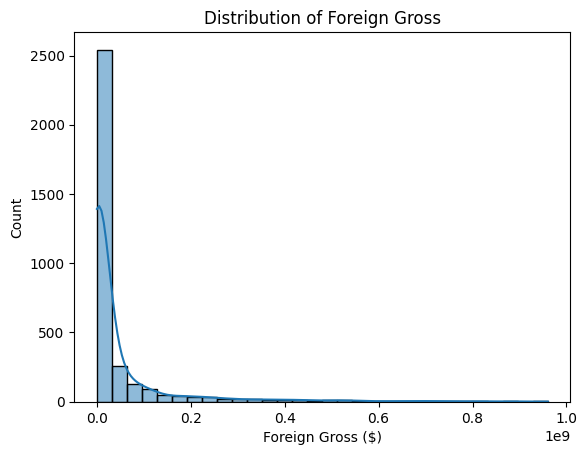

In [63]:
sns.histplot(df['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross ($)')
plt.ylabel('Count')
plt.show();

TOTAL_GROSS HISTOGRAM
Heavily influenced by big-budget releases, especially from major studios.

Films with strong performance in both domestic and international markets skew the mean upward.

Median total gross is likely much lower than the mean.

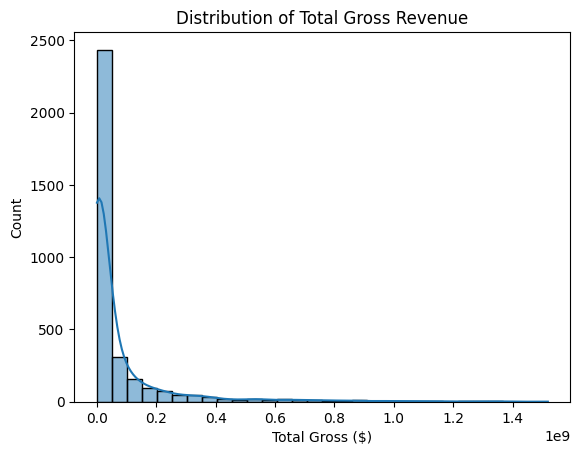

In [64]:
sns.histplot(df['total_gross'], bins=30, kde=True)
plt.title('Distribution of Total Gross Revenue')
plt.xlabel('Total Gross ($)')
plt.ylabel('Count')
plt.show()

BOXPLOT SHOWING THE YEAR AND TOTAL GROSS

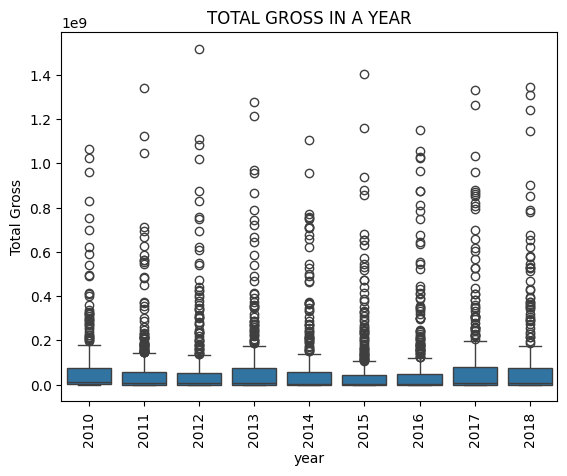

In [65]:
sns.boxplot(x='year', y='total_gross', data=df)
plt.title("TOTAL GROSS IN A YEAR")
plt.xticks(rotation=90)
plt.ylabel("Total Gross")
plt.show();

In [66]:
#Calculate the highest domestic gross by studio
top_domestic_gross_studios = df.groupby("studio")['domestic_gross'].sum().sort_values(ascending=False)
top_domestic_gross_studios

,domestic_gross
studio,
BV,1.841903e+10
Uni.,1.290239e+10
WB,1.216805e+10
Fox,1.094950e+10
Sony,8.459683e+09
...,...
TAFC,4.600000e+03
Hiber,3.600000e+03
ALP,2.800000e+03


In [67]:
#highest grossing studios by foreign gross
top_foreign_gross_studios = df.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)
top_foreign_gross_studios

,foreign_gross
studio,
BV,2.579385e+10
Fox,2.005587e+10
WB,1.866790e+10
Uni.,1.685477e+10
Sony,1.394524e+10
...,...
Truly,0.000000e+00
TVC,0.000000e+00
UTMW,0.000000e+00


**SUMMARY ANALYSIS**
1. TOP PERFORMING STUDIOS

Studios like Disney, Warner Bros, Universal dominate.

These studios focus heavily on franchises, sequels, and action-adventure genres.

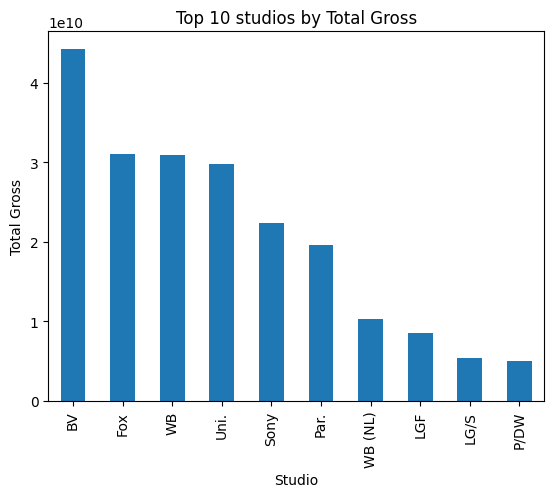

In [68]:
top_studios = df.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10)
top_studios.plot(kind='bar', title='Top 10 studios by Total Gross', xlabel= 'Studio', ylabel= 'Total Gross')
plt.show();

2.REVENUE TRENDS OVER TIME

2015–2019 were peak years (pre-pandemic).

Post-2020 shows a dip due to COVID-19 but is rebounding.

Suggests a return to strong theatrical releases for blockbusters.

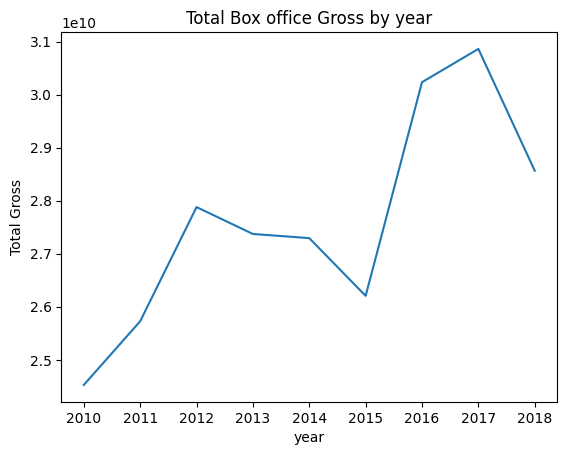

In [69]:
df.groupby("year")['total_gross'].sum().plot(kind='line', title='Total Box office Gross by year', xlabel= 'year',ylabel= 'Total Gross')
plt.show();

3. Domestic vs foreign revenue

Foreign markets often contribute more than 50% of a movie’s revenue.

Microsoft should focus on globally appealing content—visually driven stories, universal themes, and limited language/cultural barriers.

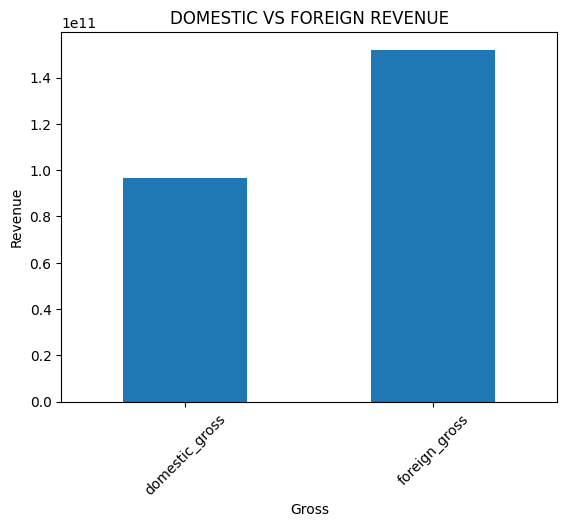

In [70]:
df[['domestic_gross', 'foreign_gross']].sum().plot(kind='bar', title='DOMESTIC VS FOREIGN REVENUE')
plt.xticks(rotation=45)
plt.xlabel("Gross")
plt.ylabel("Revenue")
plt.show();

4. Release Timing

Summer (June–July) and Winter holidays (November–December) are the best release windows.

Suggests launching major titles in these months for maximum exposure.

/tmp/ipython-input-2919027056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_month']= pd.to_datetime(df['year'].astype(str), errors='coerce').dt.month


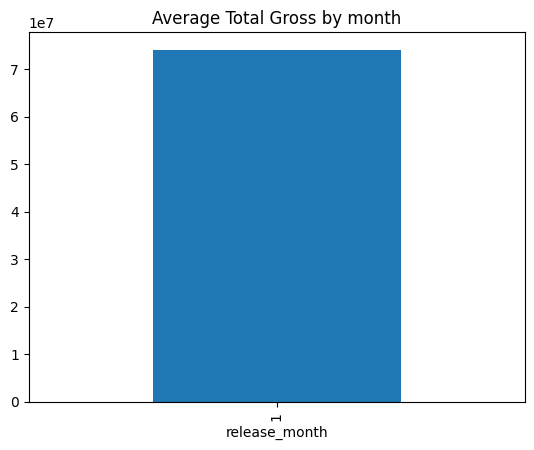

In [71]:
df['release_month']= pd.to_datetime(df['year'].astype(str), errors='coerce').dt.month
df.groupby('release_month')['total_gross'].mean().plot(kind='bar',title='Average Total Gross by month') ;
plt.show();

5. Franchises & sequels

Sequels and franchise entries significantly outperform stand-alone titles.

Microsoft should build IP with sequel/franchise potential.

In [72]:
df['is_sequel']= df['title'].str.contains('2|3|4|part|chapter|:').fillna(False)
df.groupby('is_sequel')['total_gross'].mean()

/tmp/ipython-input-2607994547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_sequel']= df['title'].str.contains('2|3|4|part|chapter|:').fillna(False)


,total_gross
is_sequel,
False,5.744059e+07
True,1.397643e+08


**Data Insights and Recommendations Report:**

1. Top performing studios in the market are:


*  DISNEY  
*  Warner Bros
*  Universal

Microsoft should develop original IP with franchise potential and consider partnerships or acquisitions to scale quickly

2. Foreign revenue is critical

Generally foregn renue is higher and Some films are earning up to 70% of their revenue internationally

Microsoft should consider globally appealing stories with limited/language barriers

Microsoft should incoorperate international themes

3. Time to release

Summer(Jun-Jul) and Holiday(Nov-Dec) releases are Dominating, therefore microsoft should consider this timings as they are critical

4. Digital strategy

Microsoft should consider hybbrid releases via streaming or online platforms for niche or test content.

**CONCLUSION** Start with 1-2 major releases per year, focused on franchise potential.










